Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Read dataset

In [2]:
df = pd.read_csv('bank_marketing.csv')
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Preprocessing

##### Handling rows/columns

In [3]:
df = pd.read_csv('bank_marketing.csv', skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
# deleting customerid column
df.drop("customerid", axis = 1, inplace = True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
# Split jobedu to get job and education data
df['job'] = df.jobedu.apply(lambda x: x.split(',')[0])
df['education'] = df.jobedu.apply(lambda x: x.split(',')[1])

In [6]:
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
# Deleting Jobedu as its not required
df.drop('jobedu', axis=1, inplace = True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [8]:
# Lets check why month is showing float object
df.month.apply([lambda x : isinstance(x, float) == True]).value_counts()

<lambda>
False       45161
True           50
Name: count, dtype: int64

##### Handling Missing value

In [9]:
# Check Missing values
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Handling missing values of Age column

In [10]:
df.age.isnull().sum()/df.shape[0]

np.float64(0.00044237021963681403)

Less than 1% record, we will drop them

In [11]:
df1 = df[~ df.age.isnull()].copy()
df1.age.isnull().sum()

np.int64(0)

Handling missing value of month

In [12]:
df1.month.isnull().sum()

np.int64(50)

In [13]:
df1.month.value_counts(normalize= True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [14]:
month_mode = df1.month.mode()[0]
df1.month.fillna(month_mode, inplace= True)
df1.month.value_counts(normalize= True)

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

Handling missing value of response

In [15]:
df1.response.isnull().sum()

np.int64(30)

In [16]:
df1.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [17]:
response_mode = df1.response.mode()[0]
df1.response.fillna(response_mode, inplace= True)
df1.response.value_counts()

response
no     39906
yes     5285
Name: count, dtype: int64

In [18]:
#df1.pdays.value_counts(normalize = True)
df1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

for pdays -1 is encoded as missing value, we will replace it with NAN so it will be treated as missing value and summary statistics won't get affected.

In [19]:
df1.loc[df1.pdays<0, 'pdays'] = np.nan

In [20]:
df1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Missing value does not always have to be null.

##### Handling Outliers

Univariate Outliers Analysis

In [21]:
# Age variable
df1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

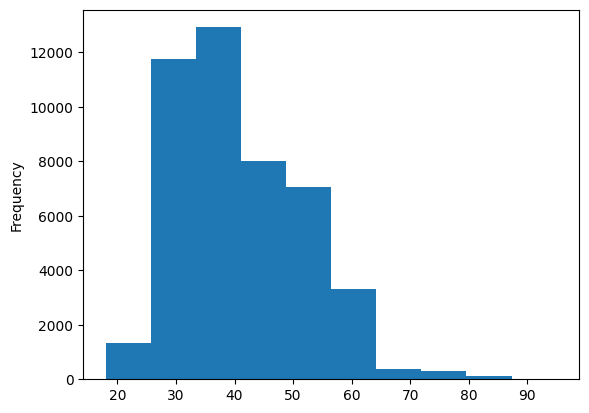

In [22]:
df1.age.plot.hist()

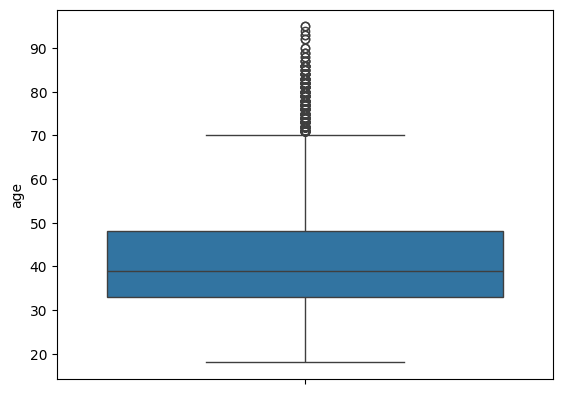

In [23]:
sns.boxplot(df1.age)
plt.show()

In [24]:
# Balance variable
df1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

-8019 could be possible in bank statement due to loan amount. However, there is vast difference between 75 quantile and max.

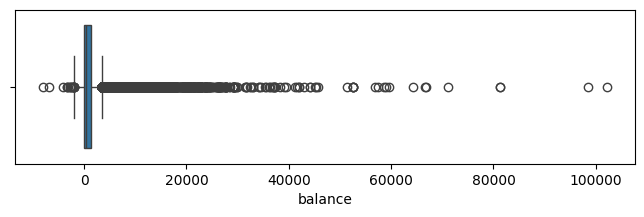

In [25]:
plt.figure(figsize = [8,2])
sns.boxplot(x=df1['balance'])
plt.show()

Lets check through quantiles

In [26]:
df1.balance.quantile([0.5,0.75,0.9,0.95,0.99])

0.50      448.0
0.75     1428.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [27]:
df1[df1.balance > 5000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,607.000000,2844.000000
mean,43.676160,63002.109705,9826.712377,16.098101,2.667018,190.835255,0.686357
std,11.465631,33521.450587,7265.021441,7.897952,3.030950,104.221137,2.166823
min,19.000000,0.000000,5003.000000,1.000000,1.000000,8.000000,0.000000
25%,34.000000,50000.000000,5960.250000,9.000000,1.000000,103.500000,0.000000
50%,42.000000,60000.000000,7572.500000,18.000000,2.000000,176.000000,0.000000
75%,52.000000,100000.000000,10760.500000,21.000000,3.000000,248.000000,0.000000
max,87.000000,120000.000000,102127.000000,31.000000,63.000000,779.000000,35.000000


This suggest that the customer with an mean age of 43 has mean salary of 63,000 which is quite fair. Can't remove them.

Handling outlier balance

In [28]:
# We will use the IQR method to detect outliers
def detect_outliers(data):
    lower_bound = np.percentile(data, 1)
    upper_bound = np.percentile(data, 99)
    return (data < lower_bound) | (data > upper_bound)
    

In [29]:
outliers = detect_outliers(df1.balance)
df1 = df1[~outliers]

In [30]:
df1.balance.describe()

count    44290.000000
mean      1176.218085
std       1916.785736
min       -627.000000
25%         78.000000
50%        448.000000
75%       1393.000000
max      13165.000000
Name: balance, dtype: float64

Standardizing columns

In [31]:
# Duration variable
df1.duration.describe()

count       44290
unique       2634
top       1.5 min
freq          134
Name: duration, dtype: object

In [32]:
df1.duration.value_counts()

duration
1.5 min                 134
1.68333333333333 min    129
2.03333333333333 min    126
2.06666666666667 min    125
1.9 min                 123
                       ... 
28.3666666666667 min      1
32.7 min                  1
14.65 min                 1
34.25 min                 1
33.7833333333333 min      1
Name: count, Length: 2634, dtype: int64

In [33]:
df1.duration = df1.duration.apply(lambda x : round(float(x.split()[0])/60,2) if x.split()[1] =='sec' else float(x.split()[0]))

In [34]:
df1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.35,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.52,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.27,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.53,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.30,1,NaN,0,unknown,no,unknown,unknown


In [35]:
df1.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

#### Filter Data

In [36]:
# Check duplicated records
df1.duplicated().sum()

np.int64(0)

In [37]:
# Filter columns
df2 = df1.drop(['contact', 'day','month','pdays'], axis = 1)

In [38]:
df2.head()

,age,salary,balance,marital,targeted,default,housing,loan,duration,campaign,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,4.35,1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,2.52,1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,1.27,1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,1.53,1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,3.30,1,0,unknown,no,unknown,unknown


### Exploratory Data Analysis

#### Univariate Anaysis

Categorical unordered univariate

In [39]:
# Marital
df2.marital.value_counts()


marital
married     26588
single      12602
divorced     5100
Name: count, dtype: int64

In [40]:
df2.marital.value_counts(normalize = True)

marital
married     0.600316
single      0.284534
divorced    0.115150
Name: proportion, dtype: float64

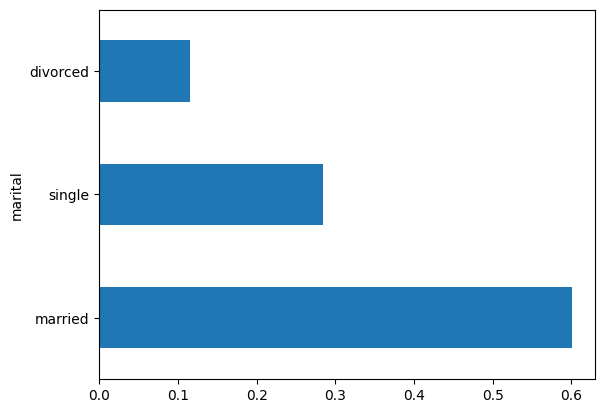

In [41]:
df2.marital.value_counts(normalize = True).plot.barh()
plt.show()

In [42]:
# Education
df2.education.value_counts(normalize= True)

education
secondary    0.514495
tertiary     0.291736
primary      0.152608
unknown      0.041161
Name: proportion, dtype: float64

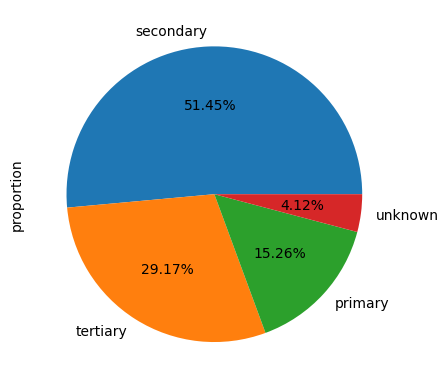

In [43]:
# Education
df2.education.value_counts(normalize= True).plot.pie(autopct = "%0.2f%%")
plt.show()

In [44]:
# poutcome variable
df2.poutcome.value_counts(normalize= True)

poutcome
unknown    0.816415
failure    0.108986
other      0.040890
success    0.033710
Name: proportion, dtype: float64

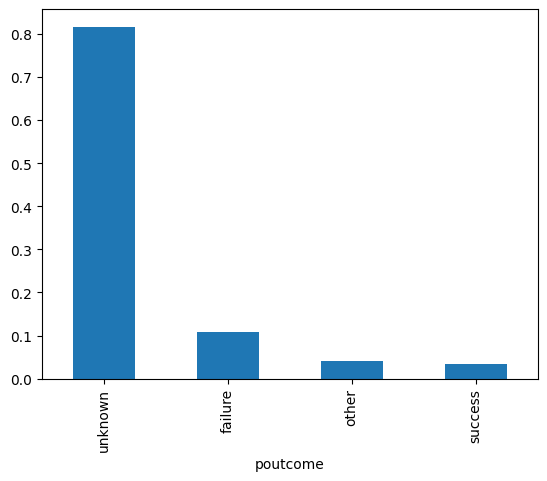

In [45]:
# poutcome variable
df2.poutcome.value_counts(normalize= True).plot.bar()
plt.show()

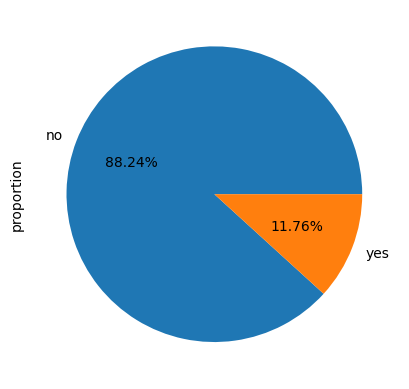

In [46]:
# response
df2.response.value_counts(normalize= True).plot.pie(autopct = "%0.2f%%")
plt.show()

#### Bivariate Analysis

##### Numerical vs Numerical

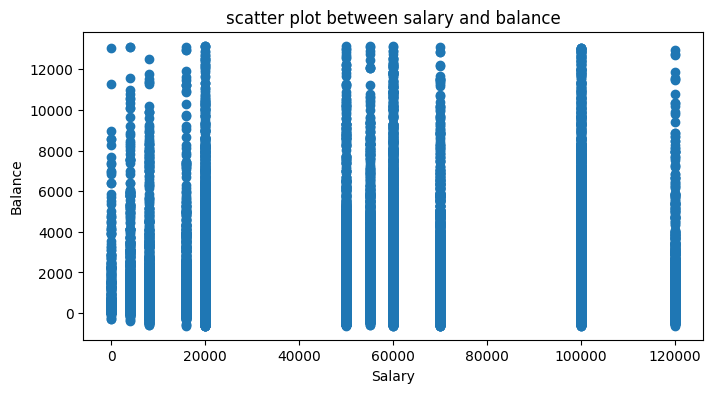

In [47]:
# scatter plot between salary and balance
plt.figure(figsize=[8,4])
plt.scatter(df2.salary, df2.balance)
plt.xlabel("Salary")
plt.ylabel("Balance")
plt.title('scatter plot between salary and balance')
plt.show()

The above plot does not seems to have any relationship between salary and balance

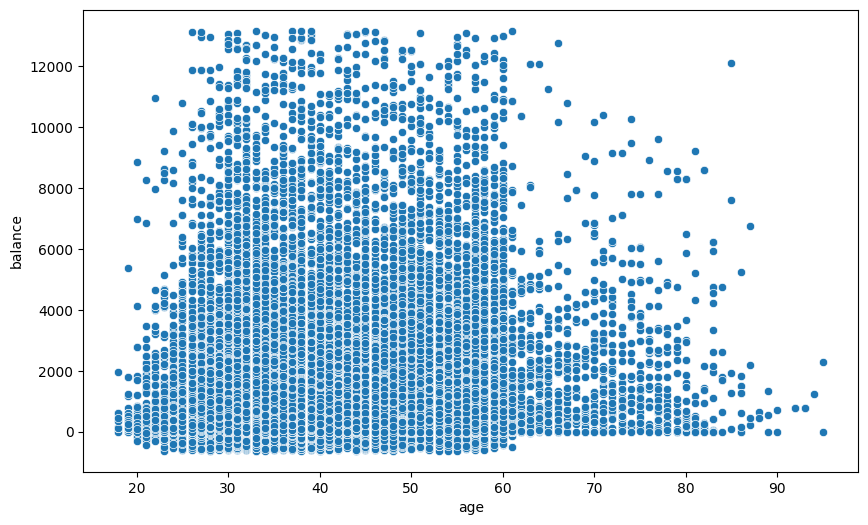

In [48]:
# scatter plot between salary and age
plt.figure(figsize=(10,6))
sns.scatterplot(x= "age", y = 'balance', data= df2)
plt.show()

<Figure size 1000x600 with 0 Axes>

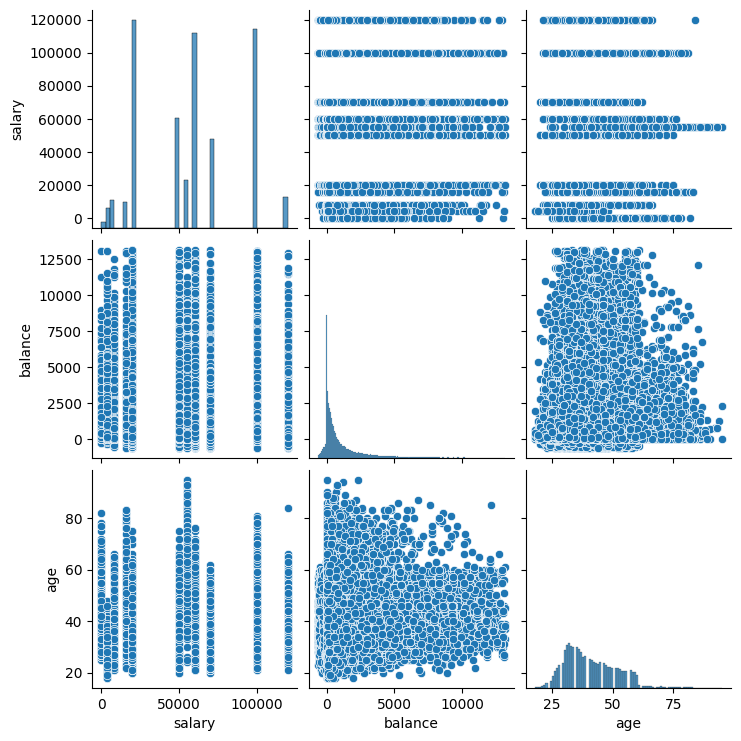

In [49]:
# pairplot between salary and balance
plt.figure(figsize=(10,6))
sns.pairplot(data= df2, vars=['salary','balance','age'])
plt.show()

Lets quantify the correlation values

In [50]:
# Correlation matrix
df2[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.022072,0.102896
salary,0.022072,1.000000,0.046355
balance,0.102896,0.046355,1.000000


Correlation Heatmap

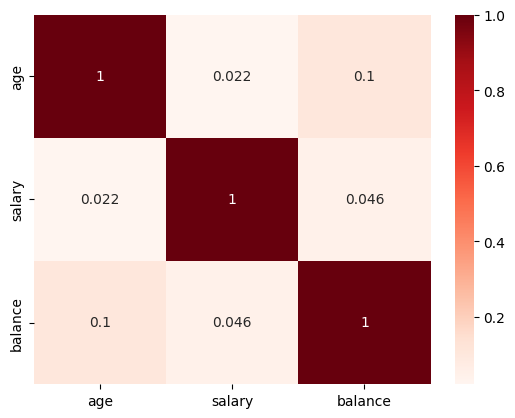

In [51]:
sns.heatmap(df2[['age','salary','balance']].corr(), annot= True, cmap='Reds')
plt.show()

Categorical vs Numerical
- check the mean values of each category

In [52]:
# Response vs salary
df2.groupby('response')['salary'].mean()

response
no     56590.286840
yes    58672.681897
Name: salary, dtype: float64

Sometimes due to outliers, mean gets influenced. So we will check median

In [53]:
df2.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

both seems to be in same range, lets check quantile range to understand the dispersion

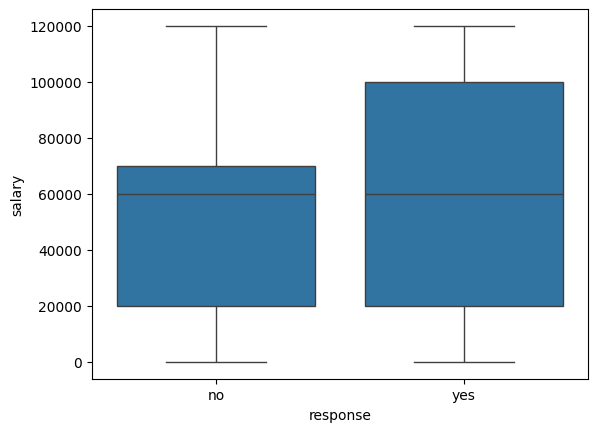

In [54]:
# Box plot
sns.boxplot(data= df2, x = 'response', y = 'salary')
plt.show()

The above boxplot suggests that, people who responded mostly belongs to higher salary range of 50k to 100k as compared to people who did not responded with a salary range of 20k to 70k. To get high ROI, bank should focus on people with the salary range of 50k and above.

In [55]:
# Response vs balance
df2.groupby('response')['balance'].mean()

response
no     1122.760114
yes    1577.291419
Name: balance, dtype: float64

In [56]:
# Response vs balance
df2.groupby('response')['balance'].median()

response
no     418.0
yes    723.0
Name: balance, dtype: float64

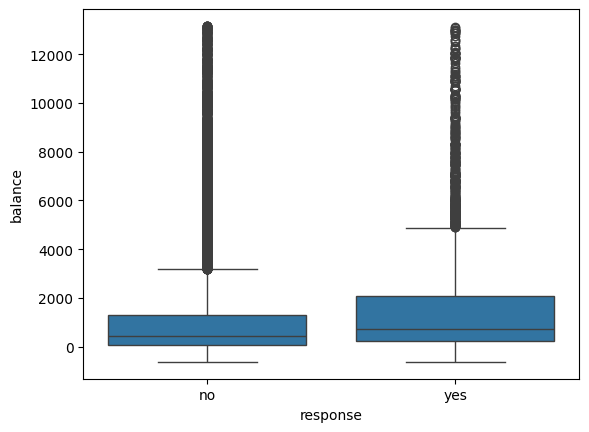

In [57]:
# Response vs balance
sns.boxplot(data= df2, x = 'response', y = 'balance')
plt.show()

In [58]:
# 75th percentile
def p75(data):
    return np.quantile(data,0.75)

In [59]:
df2.groupby('response')['balance'].aggregate(['mean','median', p75])

,mean,median,p75
response,,,
no,1122.760114,418.0,1317.0
yes,1577.291419,723.0,2090.0


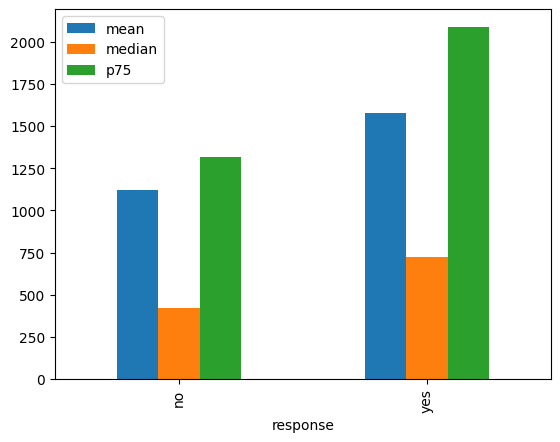

In [60]:
df2.groupby('response')['balance'].aggregate(['mean','median', p75]).plot.bar()
plt.show()

##### Categorical vs Categorical

In [61]:
df2['response_flag'] = np.where(df2.response == 'yes', 1,0)

In [62]:
df2.response_flag.value_counts()

response_flag
0    39081
1     5209
Name: count, dtype: int64

In [63]:
df2.response_flag.value_counts(normalize= True)

response_flag
0    0.882389
1    0.117611
Name: proportion, dtype: float64

In [64]:
df2.response_flag.mean()

np.float64(0.11761119891623391)

<Axes: xlabel='education'>

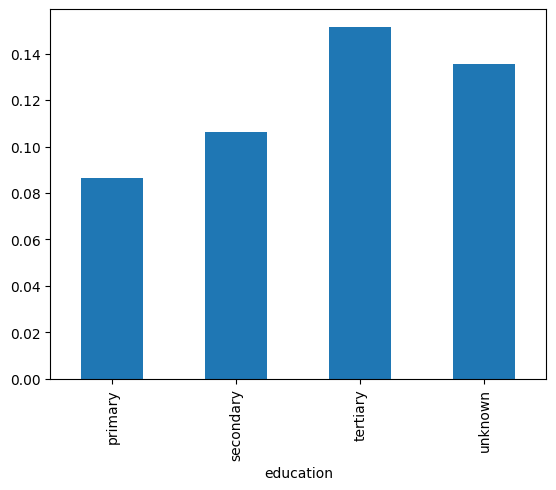

In [65]:
# Education vs response rate
df2.groupby('education')['response_flag'].mean().plot.bar()

Higher education tends to have more response rate as shown by tertiary with a response rate of 14% more than total average of 11%.

<Axes: ylabel='marital'>

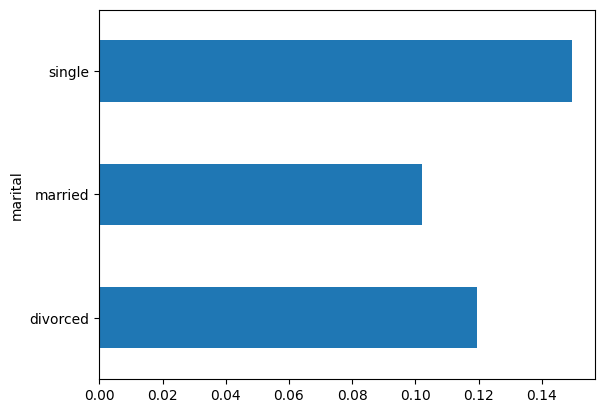

In [66]:
# marital vs response rate
df2.groupby('marital')['response_flag'].mean().plot.barh()

Single and divorced people tends to have more response than married people. May be due to family obligations.

<Axes: xlabel='loan', ylabel='response_flag'>

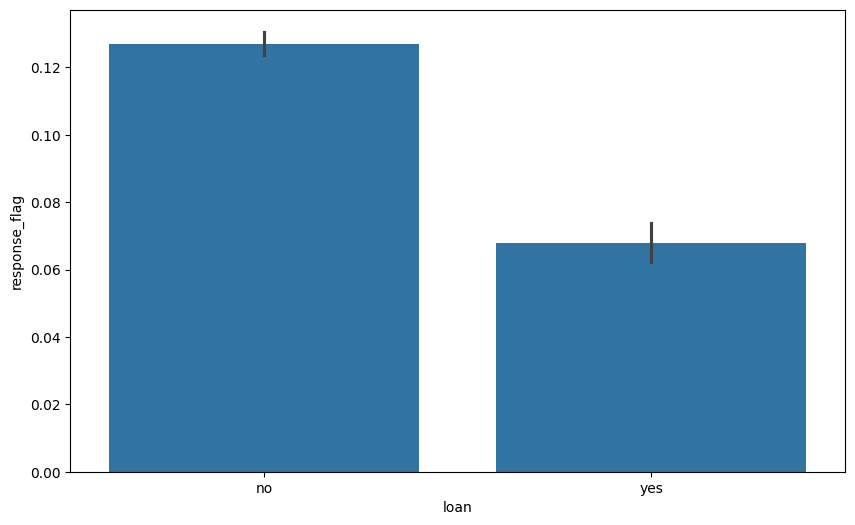

In [67]:
# loan vs response rate
plt.figure(figsize=(10,6))
sns.barplot(x='loan', y='response_flag', data=df2)

People with no loan in their account tends to respond more to the term deposit call with an average response rate of 12% than the people who have loans with a response rate of 6%.

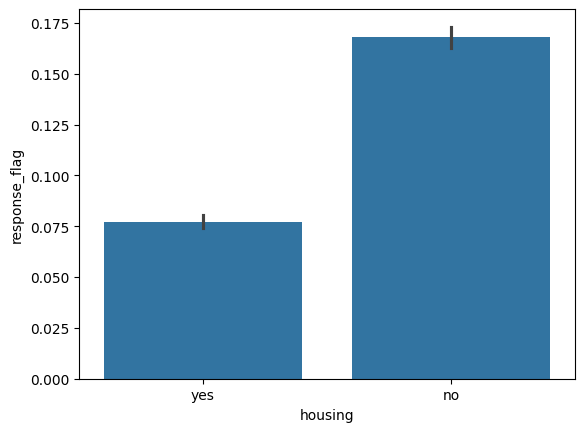

In [68]:
# housing vs response rate
sns.barplot(x= 'housing', y = 'response_flag', data = df2)
plt.show()

<Axes: xlabel='response', ylabel='age'>

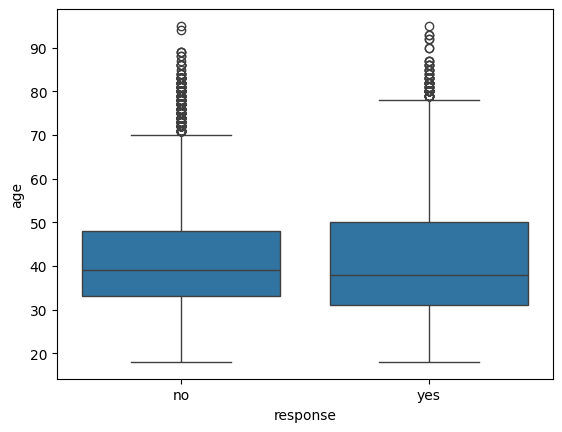

In [69]:
# age vs response
sns.boxplot(data = df2, x = 'response', y = 'age')

Age does not seems to be a factor in responding to a term deposit call.

In [70]:
df2.age

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    71.0
45208    72.0
45209    57.0
45210    37.0
Name: age, Length: 44290, dtype: float64

In [71]:
# Binning age
df2['age_group'] = pd.cut(df2.age, [0,30,40,50,60,120], labels= ["<30","30-40","40-50","50-60","60+"])

In [72]:
df2.age_group.value_counts(normalize= True)

age_group
30-40    0.392346
40-50    0.247753
50-60    0.177218
<30      0.156582
60+      0.026101
Name: proportion, dtype: float64

Most the people belongs to the age group of 30 to 40 with 39%.

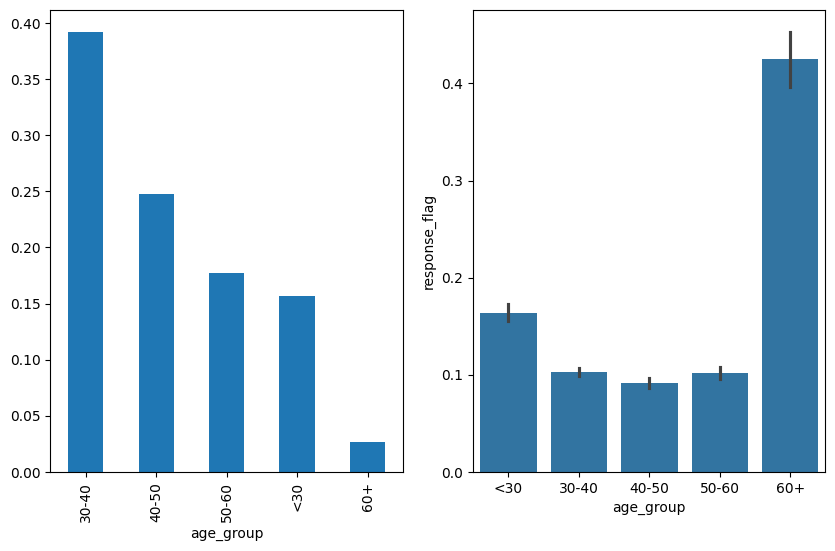

In [73]:
plt.figure(figsize = [10,6])
plt.subplot(1,2,1)
df2.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
sns.barplot(x = 'age_group', y = 'response_flag', data= df2)
plt.show()

Though age_group 30-40 had maximum portion of people however the highest respose rate of more than 40% is from 60+ age_group and then ~17% response rate from 30-40 age_group.

#### Multivariate Analysis

Here we will consider more than 2 variables to understand the effect of each other variables

Education vs Marital Status vs Response rate

In [74]:
pd.pivot_table(data= df2, index= 'education', columns= 'marital', values= 'response_flag')

marital,divorced,married,single
education,,,
primary,0.137466,0.076299,0.104762
secondary,0.103784,0.095273,0.129457
tertiary,0.139223,0.131981,0.183752
unknown,0.136905,0.123009,0.161905


Heatmap to better understand the relationship

<Axes: xlabel='marital', ylabel='education'>

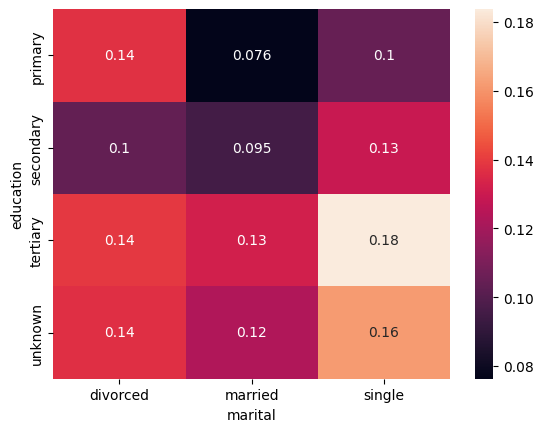

In [75]:
edu_mar_res = pd.pivot_table(data= df2, index= 'education', columns= 'marital', values= 'response_flag')
sns.heatmap(edu_mar_res, annot= True) #annot is annotation

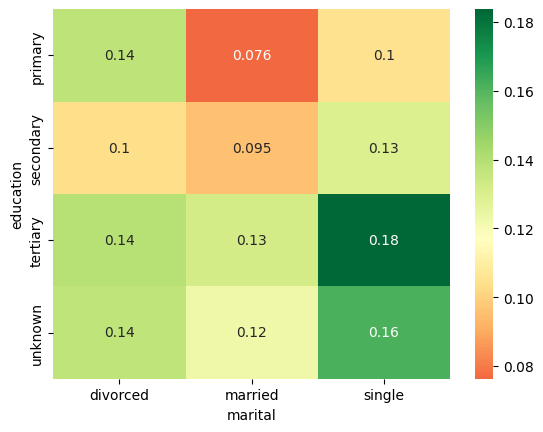

In [76]:
sns.heatmap(edu_mar_res, annot=True, cmap="RdYlGn" , center= 0.117)
plt.show()

The highest response rate of 18% is for the Highest education of tertiary and single people.
Even all the divorced people have a tendency to respond to term deposit plans.
As the education level increases, there is an increase the response rate.

This unknown category from education column suggests a similarity with the tertiary cateory hence imputing unknown with tertiary would be an good assumptions.

In [77]:
df2.education.value_counts()

education
secondary    22787
tertiary     12921
primary       6759
unknown       1823
Name: count, dtype: int64

In [78]:
# Imputing education unknown with tertiary
df2.education.replace('unknown', 'tertiary', inplace= True)

In [79]:
df2.education.value_counts()

education
secondary    22787
tertiary     14744
primary       6759
Name: count, dtype: int64

Job vs Marital vs Response

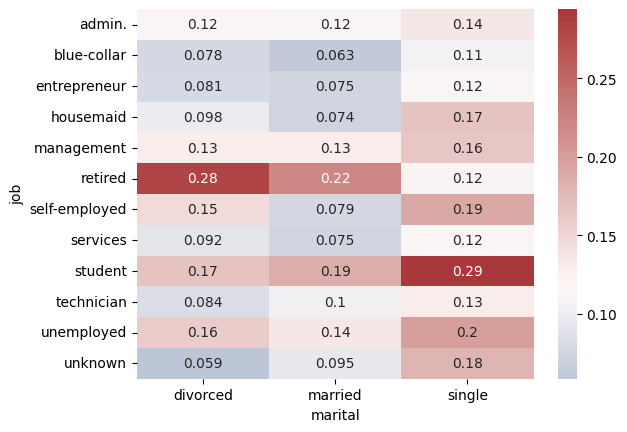

In [80]:
jb_mar_res = pd.pivot_table(data= df2, index= 'job', columns= 'marital', values= 'response_flag')
sns.heatmap(jb_mar_res, annot = True, cmap= 'vlag', center = 0.117)
plt.show()

Single students and retired divorcee has the highest and second highest response rate of 29% and 28% respectively. Retired married couple can also be targeted for their response rate.

Education vs poutcomes vs response

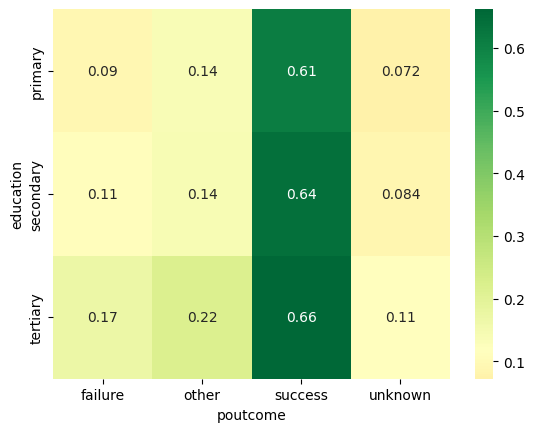

In [81]:
edu_pout_res=pd.pivot_table(data=df2,index='education', columns='poutcome', values='response_flag')
sns.heatmap(edu_pout_res, annot=True, cmap='RdYlGn',center=0.117)
plt.show()



Since there is no red tiles, then we might need to check mean specifically for poutcome.

In [82]:
df2[df2.poutcome != 'unknown'].response_flag.mean()

np.float64(0.23170581724265157)

<Axes: xlabel='poutcome', ylabel='education'>

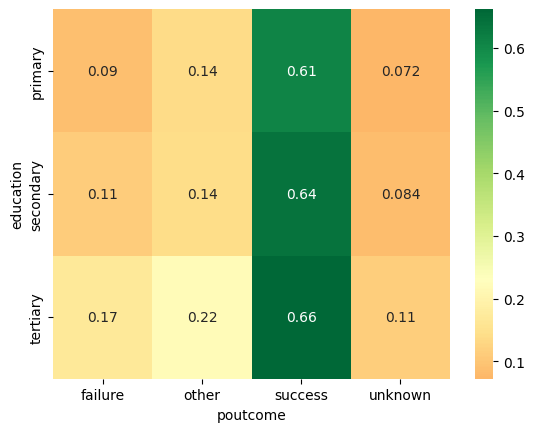

In [83]:
sns.heatmap(edu_pout_res, annot=True, cmap="RdYlGn", center= 0.23)

People who had responded last time they tend to respond again with an average response rate of 60% and that also response rate increases with the increase of education level.

### Preprocessing for Model Building

In [84]:
df2.head()


,age,salary,balance,marital,targeted,default,housing,loan,duration,campaign,previous,poutcome,response,job,education,response_flag,age_group
0,58.0,100000,2143,married,yes,no,yes,no,4.35,1,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,2.52,1,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,1.27,1,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,1.53,1,0,unknown,no,blue-collar,tertiary,0,40-50
4,33.0,0,1,single,no,no,no,no,3.30,1,0,unknown,no,unknown,tertiary,0,30-40


In [85]:
df2.describe(include='all')

,age,salary,balance,marital,targeted,default,housing,loan,duration,campaign,previous,poutcome,response,job,education,response_flag,age_group
count,44290.000000,44290.000000,44290.000000,44290,44290,44290,44290,44290,44290.000000,44290.00000,44290.000000,44290,44290,44290,44290,44290.000000,44290
unique,NaN,NaN,NaN,3,2,2,2,2,NaN,NaN,NaN,4,2,12,3,NaN,5
top,NaN,NaN,NaN,married,yes,no,yes,no,NaN,NaN,NaN,unknown,no,blue-collar,secondary,NaN,30-40
freq,NaN,NaN,NaN,26588,36350,43576,24569,37274,NaN,NaN,NaN,36159,39081,9588,22787,NaN,17377
mean,40.888846,56835.199819,1176.218085,NaN,NaN,NaN,NaN,NaN,4.306340,2.76252,0.583540,NaN,NaN,NaN,NaN,0.117611,NaN
std,10.613256,32052.287616,1916.785736,NaN,NaN,NaN,NaN,NaN,4.300556,3.09894,2.314008,NaN,NaN,NaN,NaN,0.322151,NaN
min,18.000000,0.000000,-627.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,33.000000,20000.000000,78.000000,NaN,NaN,NaN,NaN,NaN,1.716667,1.00000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,39.000000,60000.000000,448.000000,NaN,NaN,NaN,NaN,NaN,3.000000,2.00000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,48.000000,70000.000000,1393.000000,NaN,NaN,NaN,NaN,NaN,5.316667,3.00000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN


In [86]:
df3 = df2.drop(columns = ['age','response','response_flag','poutcome'])

In [87]:
df3.head()

,salary,balance,marital,targeted,default,housing,loan,duration,campaign,previous,job,education,age_group
0,100000,2143,married,yes,no,yes,no,4.35,1,0,management,tertiary,50-60
1,60000,29,single,yes,no,yes,no,2.52,1,0,technician,secondary,40-50
2,120000,2,married,yes,no,yes,yes,1.27,1,0,entrepreneur,secondary,30-40
3,20000,1506,married,no,no,yes,no,1.53,1,0,blue-collar,tertiary,40-50
4,0,1,single,no,no,no,no,3.30,1,0,unknown,tertiary,30-40


In [88]:
# x = df2.drop(columns =['age','response','response_flag','poutcome']).values
# y = df2.response_flag.values

#### Categorical Encoding

In [89]:
nominal_cat_columns = ['marital','targeted','default','housing','loan','job']
ordinal_cat_columns = ['education','age_group']
numerical_columns = ['salary','balance','duration','campaign','previous']

Encoding ordinal category

In [90]:
from sklearn.preprocessing import OrdinalEncoder

education_order = ['primary', 'secondary', 'tertiary']
age_group_order = ["<30","30-40","40-50","50-60","60+"]

oe = OrdinalEncoder(categories=[education_order,age_group_order])
df3[ordinal_cat_columns] = oe.fit_transform(df3[ordinal_cat_columns])
df3[ordinal_cat_columns]

,education,age_group
0,2.0,3.0
1,1.0,2.0
2,1.0,1.0
3,2.0,2.0
4,2.0,1.0
...,...,...
45206,2.0,3.0
45207,0.0,4.0
45208,1.0,4.0
45209,1.0,3.0


Encoding nominal category

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), nominal_cat_columns)], remainder= 'passthrough')
df3 = ct.fit_transform(df3)
df3

array([[ 0.,  1.,  0., ...,  0.,  2.,  3.],
       [ 0.,  0.,  1., ...,  0.,  1.,  2.],
       [ 0.,  1.,  0., ...,  0.,  1.,  1.],
       ...,
       [ 0.,  1.,  0., ...,  3.,  1.,  4.],
       [ 0.,  1.,  0., ...,  0.,  1.,  3.],
       [ 0.,  1.,  0., ..., 11.,  1.,  1.]])

In [92]:
x = df3
y = df2.response_flag.values

In [93]:
print(x)

[[ 0.  1.  0. ...  0.  2.  3.]
 [ 0.  0.  1. ...  0.  1.  2.]
 [ 0.  1.  0. ...  0.  1.  1.]
 ...
 [ 0.  1.  0. ...  3.  1.  4.]
 [ 0.  1.  0. ...  0.  1.  3.]
 [ 0.  1.  0. ... 11.  1.  1.]]


In [94]:
print(y)

[0 0 0 ... 1 0 0]


#### Spilitting the dataset into training and test set

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [96]:
column_names = ct.get_feature_names_out()
column_name_list = list(column_names)
print(column_name_list)

numerical_indices = []

for col in ['remainder__salary','remainder__balance','remainder__duration','remainder__campaign','remainder__previous']: # Prefix 'remainder__' is added to columns passed through 'passthrough'
    numerical_indices.append(column_name_list.index(col))
 

print("Indices of transformed data:", numerical_indices)


['encoder__marital_divorced', 'encoder__marital_married', 'encoder__marital_single', 'encoder__targeted_no', 'encoder__targeted_yes', 'encoder__default_no', 'encoder__default_yes', 'encoder__housing_no', 'encoder__housing_yes', 'encoder__loan_no', 'encoder__loan_yes', 'encoder__job_admin.', 'encoder__job_blue-collar', 'encoder__job_entrepreneur', 'encoder__job_housemaid', 'encoder__job_management', 'encoder__job_retired', 'encoder__job_self-employed', 'encoder__job_services', 'encoder__job_student', 'encoder__job_technician', 'encoder__job_unemployed', 'encoder__job_unknown', 'remainder__salary', 'remainder__balance', 'remainder__duration', 'remainder__campaign', 'remainder__previous', 'remainder__education', 'remainder__age_group']
Indices of transformed data: [23, 24, 25, 26, 27]


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,23:28] = sc.fit_transform(x_train[:,23:28])
x_test[:,23:28] = sc.transform(x_test[:,23:28])

### Model Building

#### Supervised Classification Models

##### Logistics Regression

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr_model = lr.fit(x_train,y_train)

##### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state= 0)
rfc_model = rfc.fit(x_train,y_train)

##### Kernel SVM

In [100]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state= 0)
svc_model = svc.fit(x_train,y_train)

##### XGBoost

In [104]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train, y_train)

#### Unsupervised clustering model

##### K-means Clustering

Elbow method to find the optimal number of clusters

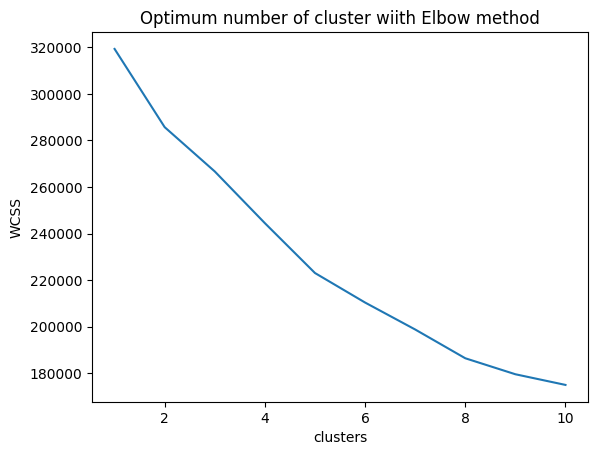

In [105]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.title('Optimum number of cluster wiith Elbow method')
plt.show()

Training on Kmeans

In [106]:
kmeans = KMeans(n_clusters= 5, init= 'k-means++', random_state= 0)
y_predict = kmeans.fit_predict(x_train)

Using PCA

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train)

kmeans = KMeans(n_clusters= 5, init= 'k-means++', random_state= 0)
y_predict = kmeans.fit_predict(x_train_reduced)

### Model Evaluation

In [108]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr_model, X = x_train, y = y_train, cv=10)
print("Logistic Regression")
print(f"Accuracy: {accuracies.mean()*100 : 0.2f} %")
print(f"Standard Deviation: {accuracies.std()*100 : 0.2f} %")

Logistic Regression
Accuracy:  88.95 %
Standard Deviation:  0.32 %


In [109]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc_model, X = x_train, y = y_train, cv=10)
print("Random Forest")
print(f"Accuracy: {accuracies.mean()*100 : 0.2f} %")
print(f"Standard Deviation: {accuracies.std()*100 : 0.2f} %")

Random Forest
Accuracy:  89.08 %
Standard Deviation:  0.40 %


In [110]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svc_model, X = x_train, y = y_train, cv=10)
print("Support Vector Machines")
print(f"Accuracy: {accuracies.mean()*100 : 0.2f} %")
print(f"Standard Deviation: {accuracies.std()*100 : 0.2f} %")

Support Vector Machines
Accuracy:  88.94 %
Standard Deviation:  0.21 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_model, X = x_train, y = y_train, cv=10)
print("Gradient Boost")
print(f"Accuracy: {accuracies.mean()*100 : 0.2f} %")
print(f"Standard Deviation: {accuracies.std()*100 : 0.2f} %")

Evaluting Clustering Model

In [112]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_train, y_predict)
print(f"Silhouette Score : {silhouette_avg}")

Silhouette Score : 0.08659545163050908


In [113]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_train_reduced, y_predict)
print(f"Silhouette Score : {silhouette_avg}")

Silhouette Score : 0.3725062944682511
